### Student Information
Name:   宋昭佑(SUNG CHAO YOU)

Student ID: R13631055

GitHub ID:  zzz318418

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zzz31\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

c:\Users\zzz31\Desktop\BIME\114-1\DataMining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [162]:
### Begin Assignment Here
import pandas as pd

# 載入 Reddit-stock-sentiment.csv 檔案
df = pd.read_csv("Reddit-stock-sentiment.csv")

# 只選擇 'text' 和 'label' 欄位
df_simplified = df[['text', 'label']]

# 顯示前五筆資料
print(df_simplified.head(5))


                                                text  label
0                                   Calls on retards   -1.0
1  Stunt as in like why did they even make a big ...    0.0
2                  Seeing lots of red in the ticker.    0.0
3  Vision Marine Technologies Inc. is rewriting t...    1.0
4                           He didn’t say thank you.   -1.0


In [5]:
# 使用 Pandas 的 iloc 來選擇前兩行文本
df_simplified.iloc[0:2]['text']


0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
Name: text, dtype: object

In [6]:
df_simplified.text

0                                       Calls on retards
1      Stunt as in like why did they even make a big ...
2                      Seeing lots of red in the ticker.
3      Vision Marine Technologies Inc. is rewriting t...
4                               He didn’t say thank you.
                             ...                        
842          Invest now it is going to shoot up tomorrow
843                               Where can I read this?
844    Upgrades, Downgrades\n\n [Stock Analyst Recomm...
845    i sold my puts so i expect cheeto to declare w...
846                         ![img](emote|t5_2th52|31224)
Name: text, Length: 847, dtype: object

In [7]:
len(df_simplified)

847

In [8]:
len(df_simplified.text)

847

In [9]:
len(df_simplified.label)

847

In [10]:
df_simplified.text[0]

'Calls on retards'

In [11]:
df_simplified.text[0:10]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

In [12]:
# 先定義標籤對應的情感名稱
label_names = {1.0: 'Positive', 0.0: 'Neutral', -1.0: 'Negative'}

# 遍歷前 10 條資料，打印其情感標籤名稱
for label in df_simplified['label'][:10]:
    print(label_names[label])


Negative
Neutral
Neutral
Positive
Negative
Neutral
Negative
Neutral
Positive
Positive


In [13]:
# 遍歷前 3 條資料
for i in range(3):
    print(f"ex{i+1}:")
    # 將 text 欄位中的文本按行分割並打印
    print("\n".join(df_simplified['text'][i].split("\n")))

ex1:
Calls on retards
ex2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
ex3:
Seeing lots of red in the ticker.


In [14]:
# 先定義標籤對應的情感名稱
label_names = {1.0: 'Positive', 0.0: 'Neutral', -1.0: 'Negative'}

# 使用 .apply() 方法遍歷 df_simplified['label'] 欄位並轉換為情感標籤名稱
df_simplified['label_mean'] = df_simplified['label'].apply(lambda x: label_names.get(x, 'Unknown'))



C:\Users\zzz31\AppData\Local\Temp\ipykernel_47468\2465695234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simplified['label_mean'] = df_simplified['label'].apply(lambda x: label_names.get(x, 'Unknown'))


In [15]:
df_simplified[0:10]

,text,label,label_mean
0,Calls on retards,-1.0,Negative
1,Stunt as in like why did they even make a big ...,0.0,Neutral
2,Seeing lots of red in the ticker.,0.0,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive
4,He didn’t say thank you.,-1.0,Negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,Neutral
6,Trump will respond to china increasing their t...,-1.0,Negative
7,Confirmed not a trap. Its been like this for p...,0.0,Neutral
8,Am I the only one seeing the cup & handle brea...,1.0,Positive
9,HLGN is $10. Hurry and catch it now before it ...,1.0,Positive


In [16]:
# 使用 .iloc() 或 .head() 來選取前 10 條資料，並選擇 'text' 和 'category_name' 欄位
df_simplified.iloc[:10][['text', 'label_mean']]


,text,label_mean
0,Calls on retards,Negative
1,Stunt as in like why did they even make a big ...,Neutral
2,Seeing lots of red in the ticker.,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,Positive
4,He didn’t say thank you.,Negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",Neutral
6,Trump will respond to china increasing their t...,Negative
7,Confirmed not a trap. Its been like this for p...,Neutral
8,Am I the only one seeing the cup & handle brea...,Positive
9,HLGN is $10. Hurry and catch it now before it ...,Positive


In [17]:
df_simplified.iloc[-10:]

,text,label,label_mean
837,Finance media lying \n\n*Surprise*,-1.0,Negative
838,I am all in,0.0,Neutral
839,The Art of the Deal…,0.0,Neutral
840,Lol fr,0.0,Neutral
841,So countries “begging to stop the tariffs” and...,1.0,Positive
842,Invest now it is going to shoot up tomorrow,1.0,Positive
843,Where can I read this?,0.0,Neutral
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,Neutral
845,i sold my puts so i expect cheeto to declare w...,-1.0,Negative
846,![img](emote|t5_2th52|31224),0.0,Neutral


In [18]:
df_simplified.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [19]:
print(df_simplified.loc[:10, 'text'])

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object


In [20]:
df_simplified.iloc[:10, 0]


0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

In [21]:
# 假設 df_simplified 中已經有 'category' 欄位
result = df_simplified.query('label == 1.0')
result

,text,label,label_mean
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive
8,Am I the only one seeing the cup & handle brea...,1.0,Positive
9,HLGN is $10. Hurry and catch it now before it ...,1.0,Positive
34,So they went from saying redditors are bad for...,1.0,Positive
38,"Hey our net worth match now, we can be friends!",1.0,Positive
...,...,...,...
830,powell already said inflations from tariffs is...,1.0,Positive
831,Things will get better soon. Once those 9 tran...,1.0,Positive
832,NICE. Cannot complain.,1.0,Positive
841,So countries “begging to stop the tariffs” and...,1.0,Positive


In [22]:
df_simplified[df_simplified['label_mean'] == 'Positive'][::10][0:5]

,text,label,label_mean
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive
78,I think it’s gonna work itself out. I bought t...,1.0,Positive
168,The obvious can also be refreshing from CNBC: ...,1.0,Positive
219,Same. Back to break even after that last rip b...,1.0,Positive
319,Etrade has a feed of news articles about how r...,1.0,Positive


In [23]:
# check missing values
df_simplified.isnull()

,text,label,label_mean
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [24]:
# my functions
import helpers.data_mining_helpers as dmh
df_simplified.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_mean
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [25]:
# Answer here
df_simplified.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [26]:
dummy_series = pd.Series(["dummy_record", 1.0], index=["text", "label"])

In [27]:
dummy_series

text     dummy_record
label             1.0
dtype: object

In [28]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,text,label
0,dummy_record,1.0


In [29]:
result_with_series = pd.concat([df_simplified, dummy_series.to_frame().T], ignore_index=True)

In [30]:
# check if the records was commited into result
len(result_with_series)

848

In [31]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_mean
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [32]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'label': 1.0
              }]

In [33]:
df_simplified = pd.concat([df_simplified, pd.DataFrame(dummy_dict)], ignore_index=True)

In [34]:
len(df_simplified)

848

In [35]:
df_simplified.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_mean
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [36]:
df_simplified.dropna(inplace=True)

In [37]:
df_simplified.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_mean
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [38]:
len(df_simplified)

847

In [39]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [40]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

第 0 列（A）：float（np.nan 屬於 float 型別）

第 1 列（B）：float（缺欄位會自動補 NaN，屬於 float 型別）

第 2 列（C）：str（'NaN' 是字串）

第 3 列（D）：str（'None' 是字串）

第 4 列（E）：float（Python 的 None 會被 pandas 當成 NaN，屬於 float 型別）

第 5 列（F）：str（空字串 '' 是字串）


In [41]:
df_simplified.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [42]:
sum(df_simplified.duplicated())

23

In [43]:
sum(df_simplified.duplicated('text'))

23

In [44]:
df_simplified.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [45]:
len(df_simplified)

813

In [46]:
X_sample = df_simplified.sample(n=100) #random state

In [47]:
len(X_sample)

100

In [48]:
X_sample[0:4]

,text,label,label_mean
738,Plain spaghetti not so bad actually,0.0,Neutral
543,&#x200B;\n\n,0.0,Neutral
66,The funny part is that Elmo has called Navarro...,-1.0,Negative
147,Isnt that economics? What trump says have mass...,-1.0,Negative


In [49]:
X_sample.index

Index([738, 543,  66, 147, 326, 704, 156, 228, 184, 642, 423, 539, 400, 467,
       562, 245, 799, 182,  27, 257, 550, 104, 131, 568, 288, 696, 233, 741,
       166,  61, 660, 765, 133, 733, 332,  50, 379, 477, 410, 489, 191, 626,
       320, 227, 414, 500, 317, 770, 437, 185, 347, 460, 519, 452, 772, 674,
       838, 186, 756, 211, 610, 634, 267, 148, 832, 263, 734, 149, 706, 380,
       299, 537, 264, 404, 202, 304, 629,  38, 244, 174,  88, 726,  44,  35,
       652, 146, 701,   7, 481, 453,  67, 300, 576, 596, 834, 291, 417, 485,
       784, 729],
      dtype='int64')

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
ca=['Negative', 'Neutral', 'Positive']

label_mean
Neutral     391
Negative    315
Positive    107
Name: count, dtype: int64


<Axes: title={'center': 'distribution'}, xlabel='label_mean'>

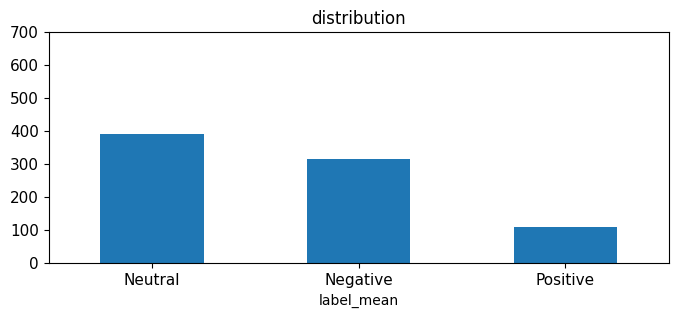

In [52]:
print(df_simplified.label_mean.value_counts())

# plot barchart for X
df_simplified.label_mean.value_counts().plot(kind = 'bar',
                                    title = 'distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

label_mean
Neutral     54
Negative    36
Positive    10
Name: count, dtype: int64


<Axes: title={'center': 'distribution'}, xlabel='label_mean'>

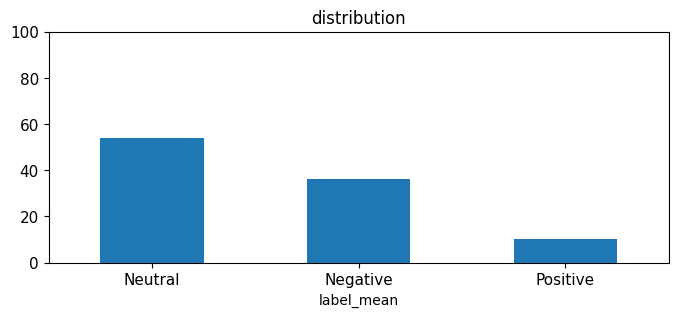

In [53]:
print(X_sample.label_mean.value_counts())

# plot barchart for X
X_sample.label_mean.value_counts().plot(kind = 'bar',
                                    title = 'distribution',
                                    ylim = [0, 100],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}, xlabel='label_mean'>

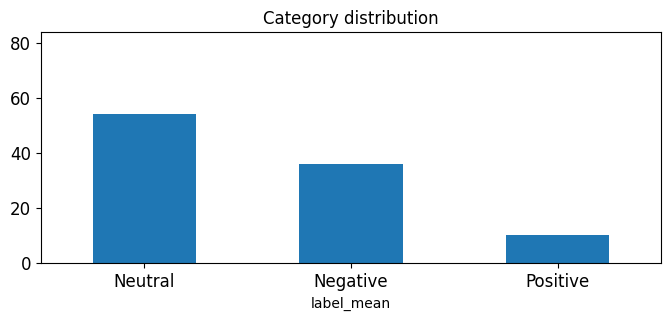

In [54]:
X_sample.label_mean.value_counts().plot(
    kind='bar',
    title='Category distribution',
    ylim=[0, X_sample.label_mean.value_counts().max() + 30],
    rot=0,
    fontsize=12,
    figsize=(8, 3)
)

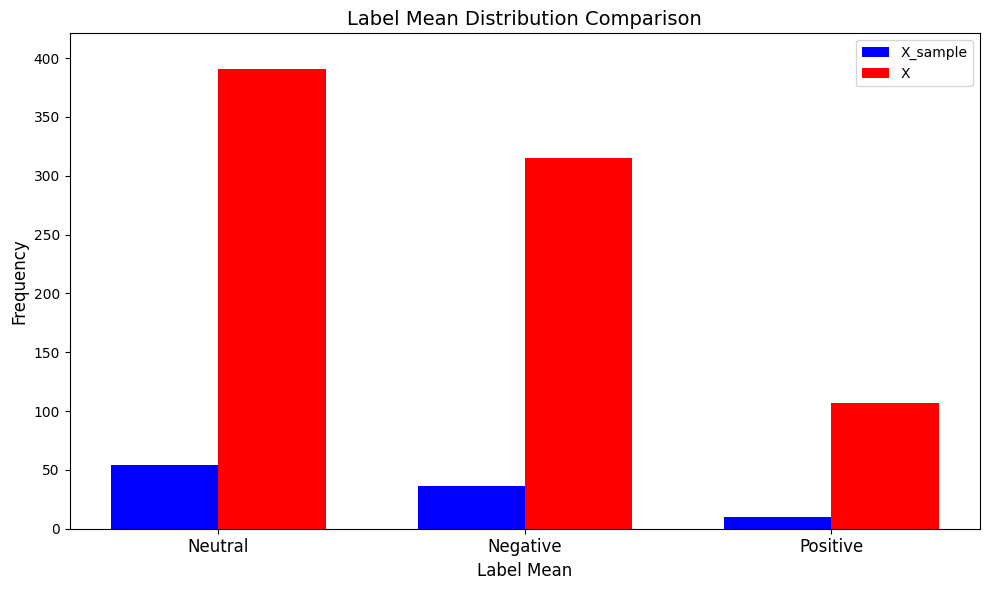

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# 假設 df_simplified 和 X_sample 已經定義並且包含 'label_mean' 欄位
# 計算 X_sample 和 X 中 'label_mean' 欄位的計數
dataset1 = X_sample.label_mean.value_counts()
dataset2 = df_simplified.label_mean.value_counts()

# 設置柱狀圖的寬度
bar_width = 0.35
index = np.arange(len(dataset1))  # x軸的刻度位置

# 創建圖形
fig, ax = plt.subplots(figsize=(10, 6))

# 繪製 dataset1 (X_sample) 的分佈
ax.bar(index, dataset1, bar_width, label='X_sample', color='b')

# 繪製 dataset2 (df_simplified) 的分佈，並將其往右偏移一點
ax.bar(index + bar_width, dataset2, bar_width, label='X', color='r')

# 添加標題與標籤
ax.set_title('Label Mean Distribution Comparison', fontsize=14)
ax.set_xlabel('Label Mean', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# 設置x軸的刻度位置和標籤
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(dataset1.index, rotation=0, fontsize=12)

# 設置y軸範圍
ax.set_ylim([0, max(dataset1.max(), dataset2.max()) + 30])

# 添加圖例
ax.legend()

# 調整布局，防止文字重疊
plt.tight_layout()

# 顯示圖表
plt.show()


5.2 Feature Creation

In [56]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zzz31\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zzz31\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [57]:
df_simplified['unigrams'] = df_simplified['text'].apply(lambda x: dmh.tokenize_text(x))

In [58]:
df_simplified[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [59]:
df_simplified[0:4]

,text,label,label_mean,unigrams
0,Calls on retards,-1.0,Negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,Neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [60]:
list(df_simplified[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature subset selection

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_simplified['text']) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


In [62]:
df_simplified['unigrams'][0]

['Calls', 'on', 'retards']

In [63]:
count_vect.get_feature_names_out()[689]

'calls'

In [64]:
analyze = count_vect.build_analyzer()

In [65]:
analyze(df_simplified['text'][0])

['calls', 'on', 'retards']

In [66]:
X_counts.shape

(813, 4313)

In [67]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [68]:
# we convert from sparse array to normal array
X_counts[-5:, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [69]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

i see the `1` at the last of the fifth record, let's find what it  represents ?

In [70]:
# Answer here
# 獲取第最後一條記錄（索引為812，因為長度為813，索引從0開始）來自 X_counts
last_record = X_counts[812]

# 獲取該記錄中值為 1 的索引（即在此記錄中出現的詞的索引）
indices = last_record.nonzero()[1]  # nonzero() 返回非零元素的行和列索引，這裡選擇列索引

# 使用索引從詞彙表中獲取對應的詞
#獲取第最後一條記錄第一筆非0數據
words = count_vect.get_feature_names_out()[indices[0]]
# words = count_vect.get_feature_names_out()[indices]

# 輸出對應的詞
print(words)

img


In [71]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [72]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df_simplified.index)[0:20]]

In [73]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

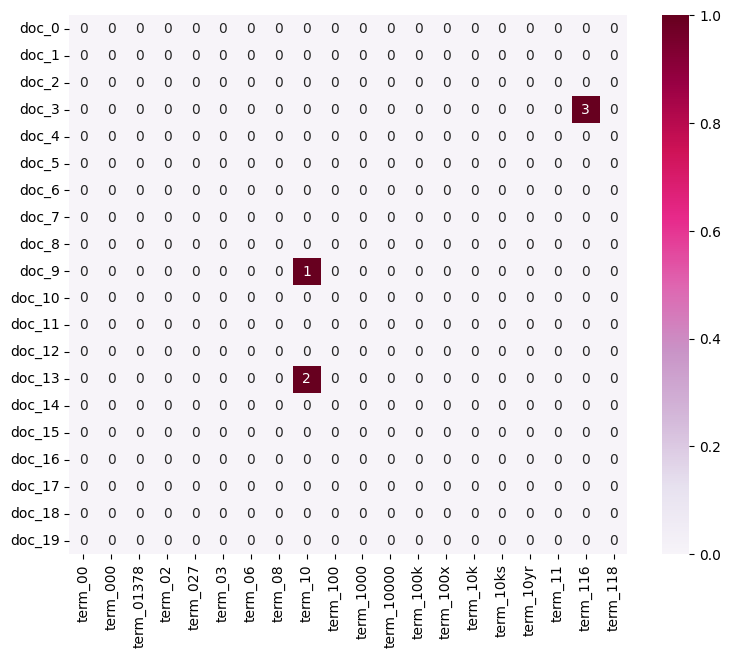

In [74]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

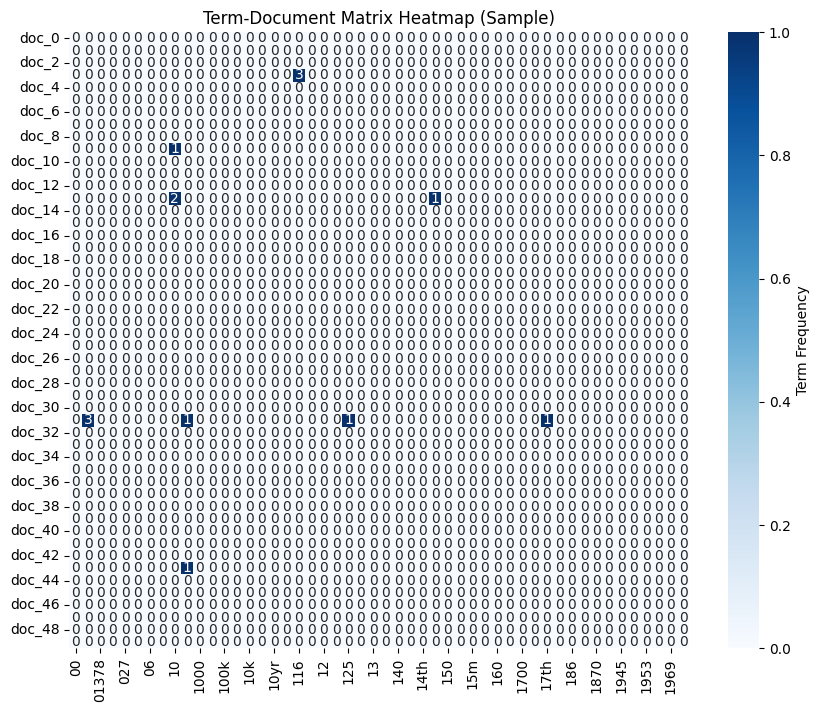

In [75]:
# Answer here
# X_counts 已經是詞項-文檔矩陣
# 將 X_counts 轉換為密集矩陣並取前 50 個詞和 50 個文檔
X_dense = X_counts.toarray()
df_todraw = pd.DataFrame(X_dense[:50, :50], columns=count_vect.get_feature_names_out()[:50], index=[f'doc_{i}' for i in range(50)])

# 設定畫圖的大小
plt.subplots(figsize=(10, 8))

# 使用 seaborn 畫熱力圖
ax = sns.heatmap(df_todraw,
                 cmap="Blues",   # 顏色映射
                 annot=True,     # 顯示每個格子的數值
                 vmin=0, vmax=1, # 設置顏色的範圍
                 cbar_kws={'label': 'Term Frequency'}) # 顯示顏色條的標籤

# 顯示圖表
plt.title('Term-Document Matrix Heatmap (Sample)')
plt.show()





In [76]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [77]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [78]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

C:\Users\zzz31\AppData\Local\Temp\ipykernel_47468\3140323867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

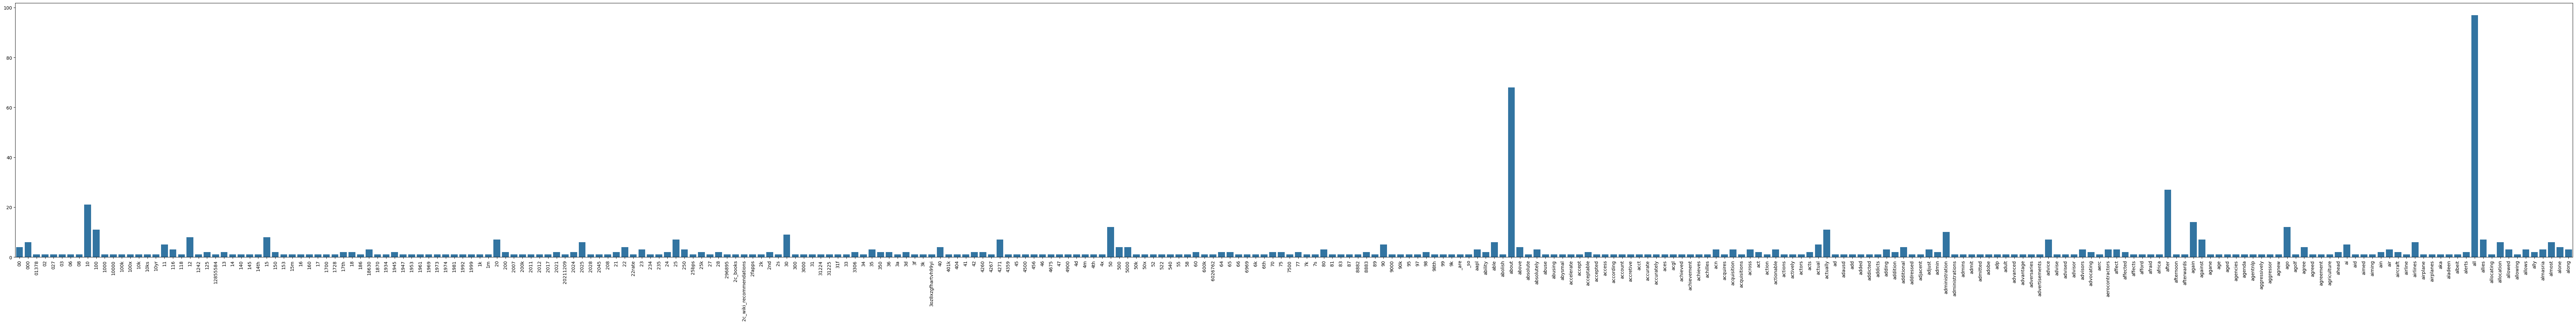

In [79]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [80]:
# Answer here
import plotly.express as px
import pandas as pd

# 假設 `term_frequencies` 和 `count_vect.get_feature_names_out()` 已經定義

# 創建一個 DataFrame 來進行繪圖
df_plot = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:300],  # 前300個詞
    'Frequency': term_frequencies[:300]               # 對應的詞頻
})

# 使用 Plotly 畫條形圖
fig = px.bar(df_plot, 
             x='Term', 
             y='Frequency', 
             title='Top 300 Most Frequent Terms', 
             labels={'Term': 'Words', 'Frequency': 'Frequency'},
             text='Frequency')  # 在條形上顯示頻率

# 調整 X 軸標籤的顯示角度
fig.update_xaxes(tickangle=90)

# 顯示圖表
fig.show()


In [81]:
# Answer here
import plotly.express as px
import pandas as pd
import numpy as np

# 假設 term_frequencies 和 count_vect 已經定義

# 計算每個詞的頻率
word_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# 選擇前 N 個最常見的詞
N = 50  # 假設我們只選擇前 50 個最常見的詞
top_n_indices = np.argsort(word_frequencies)[-N:]  # 找出前 N 個詞的索引
top_n_terms = count_vect.get_feature_names_out()[top_n_indices]
top_n_frequencies = word_frequencies[top_n_indices]

# 創建 DataFrame 進行可視化
df_top_n = pd.DataFrame({
    'Term': top_n_terms,
    'Frequency': top_n_frequencies
})

# 使用 Plotly 畫條形圖
fig = px.bar(df_top_n, 
             x='Term', 
             y='Frequency', 
             title=f'Top {N} Most Frequent Terms', 
             labels={'Term': 'Words', 'Frequency': 'Frequency'},
             text='Frequency')  # 在條形上顯示頻率

# 調整 X 軸標籤的顯示角度
fig.update_xaxes(tickangle=90)

# 顯示圖表
fig.show()


In [82]:
# Answer here
import plotly.express as px
import pandas as pd
import numpy as np

# 假設 term_frequencies 和 count_vect 已經定義

# 計算每個詞的頻率
word_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# 根據頻率排序詞彙
sorted_indices = np.argsort(word_frequencies)[::-1]  # 逆向排序，從高到低
sorted_terms = count_vect.get_feature_names_out()[sorted_indices]
sorted_frequencies = word_frequencies[sorted_indices]

# 創建 DataFrame 來進行可視化
df_sorted = pd.DataFrame({
    'Term': sorted_terms[:300],  # 顯示前 300 個詞
    'Frequency': sorted_frequencies[:300]  # 對應的頻率
})

# 使用 Plotly 畫條形圖
fig = px.bar(df_sorted, 
             x='Term', 
             y='Frequency', 
             title='Top 300 Terms by Frequency', 
             labels={'Term': 'Words', 'Frequency': 'Frequency'},
             text='Frequency')  # 在條形上顯示頻率

# 調整 X 軸標籤的顯示角度
fig.update_xaxes(tickangle=90)

# 顯示圖表
fig.show()



In [83]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\zzz31\AppData\Local\Temp\ipykernel_47468\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



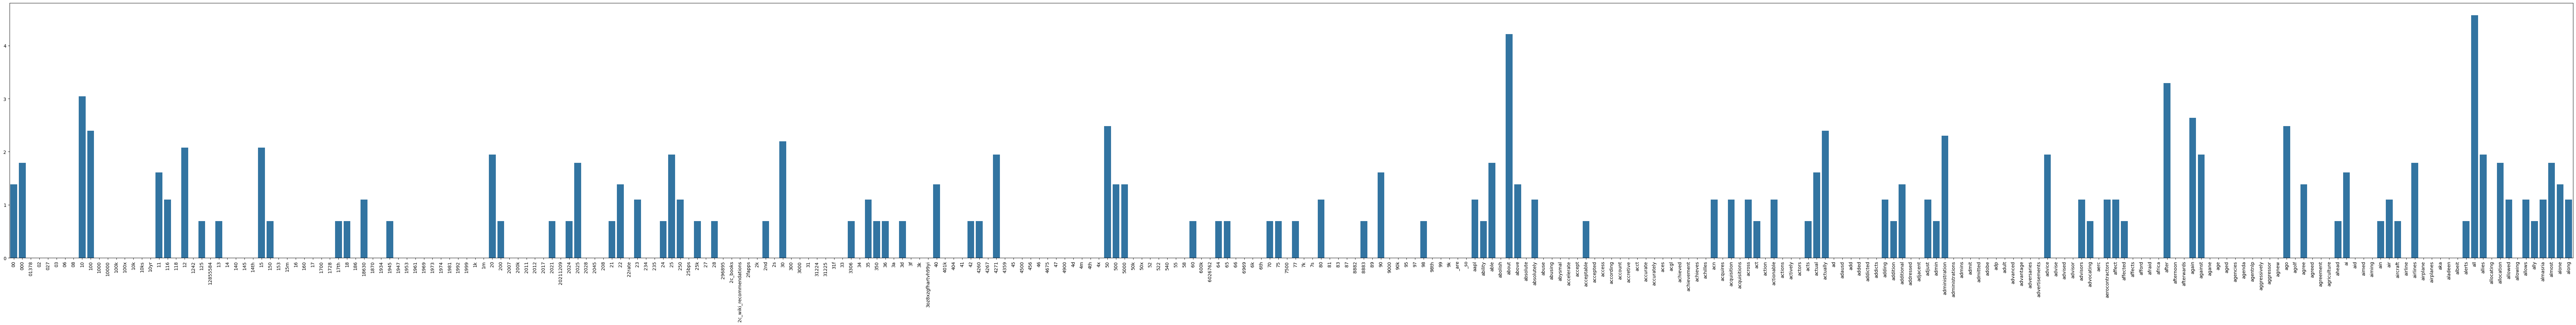

In [84]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\zzz31\AppData\Local\Temp\ipykernel_47468\67503655.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



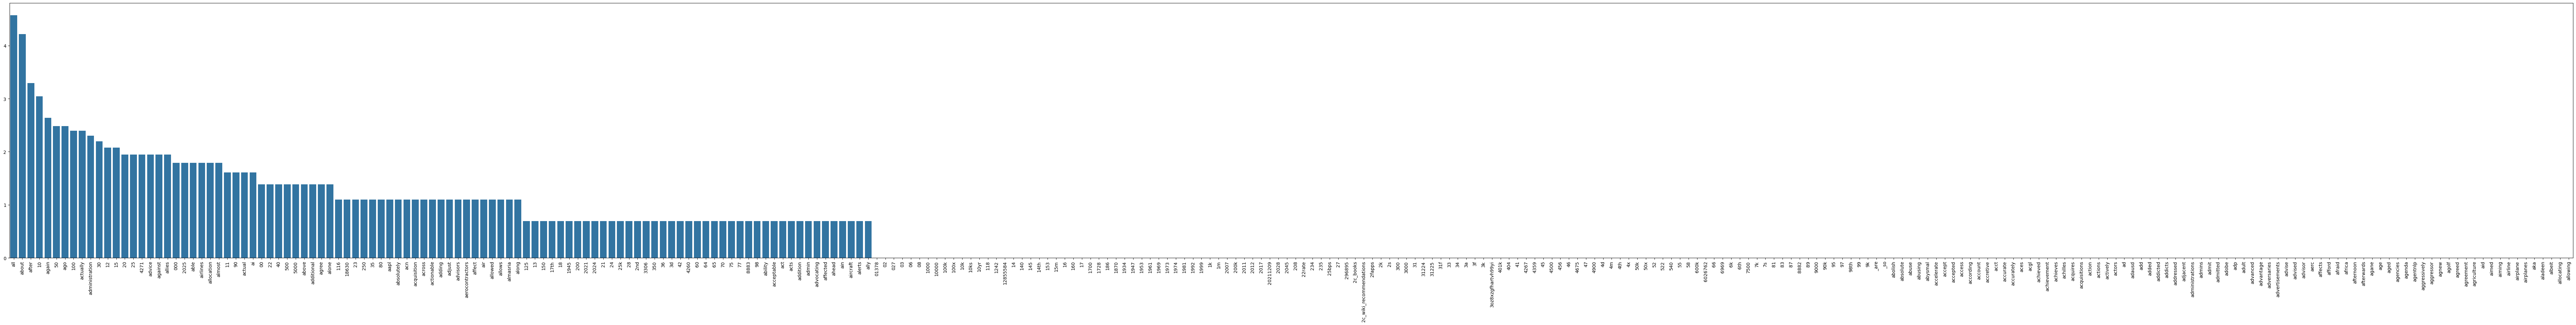

In [85]:
# Answer here
import math
import matplotlib.pyplot as plt
import seaborn as sns

# 假設 term_frequencies 是詞頻列表

# 對詞頻進行對數轉換
term_frequencies_log = [math.log(i) for i in term_frequencies if i > 0]  # 避免log(0) 的情況

# 排序詞頻
sorted_terms = sorted(zip(count_vect.get_feature_names_out()[:300], term_frequencies_log), key=lambda x: x[1], reverse=True)
sorted_terms, sorted_frequencies = zip(*sorted_terms)

# 繪製條形圖
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=sorted_terms, y=sorted_frequencies)
g.set_xticklabels(sorted_terms, rotation=90)
plt.show()


End of Phase 1(hw1)

# Phase 2

In [97]:
### Begin Assignment Here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['subreddit'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['subreddit'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [105]:
category_number=3 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category stocks:


,00,000,02,03,06,10,100,10000,10ks,10yr,...,you,young,your,yours,yourself,yoyo,yup,zero,zgld,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


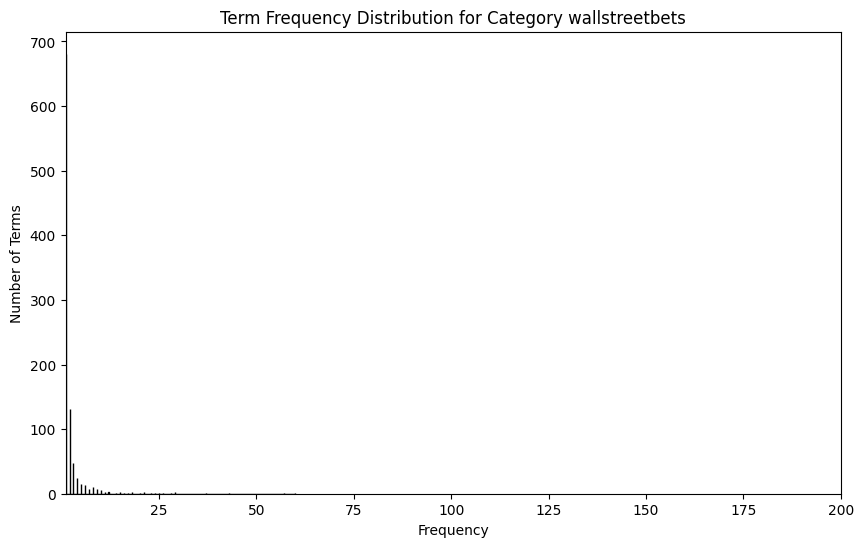

In [106]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

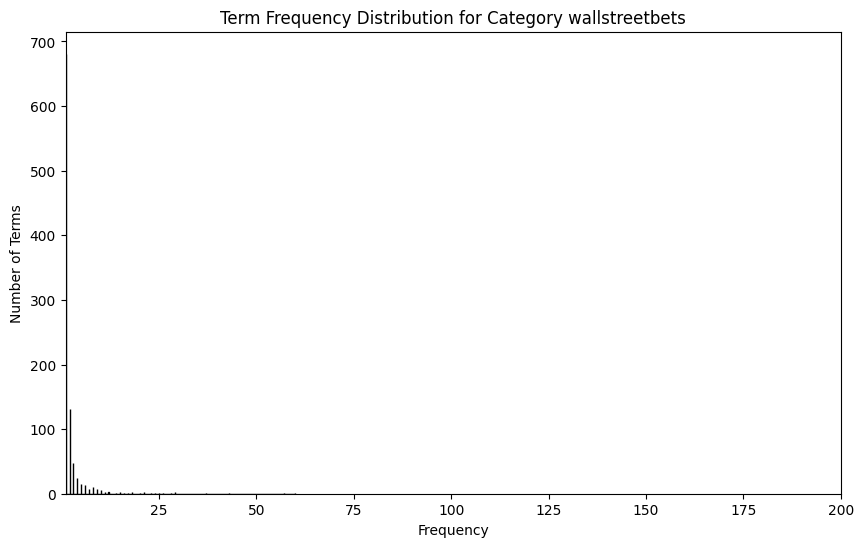

In [107]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [108]:
category_number=3 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: stocks
Number of terms in top 5%: 117
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'you', 'that', 'on', 'this', 'for', 'will', 'are', 'be', 'if', 'as', 'us', 'with', 'but', 'he', 'all', 'not', 'trump', 'at', 'they', 'have', 'what', 'was', 'or', 'so', 'we', 'people', 'like', 'my', 'has', 'market', 'from', 'there', 'more', 'now', 'no', 'your', 'think', 'china', 'by', 'just', 'their', 'silver', 'how', 'can', 'do', 'even', 'money', 'than', 'an', 're', 'other', 'one', 'why', 'would', 'about', 'going', 'tariffs', 'any', 'some', 'them', 'our', 'don', 'who', 'down', 'see', 'when', 'economy', 'most', 'then', 'because', 'his', 'world', 'me', 'up', 'want', 'been', 'term', 'time', 'back', 'companies', 'already', 'much', 'doing', 'really', 'which', 'only', 'sell', 'years', 'last', 'portfolio', '10', 'good', 'too', 'trade', 'into', 'out', 'could', 'every', 'day', 'over', 'buy', 'countries', 'things', 'go', 'here', 'company', 'does', 'were', 'wants', 'point']


In [109]:
sorted_counts #We can see the frequencies sorted in a descending order

array([399, 251, 187, ...,   1,   1,   1])

In [110]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

np.int64(399)

In [111]:
category_number=3 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: stocks
Number of terms in bottom 1%: 23
Filtered terms: ['50k', '50x', '52', '60', '65', '70', '77', '22rate', '235', '2045', '31f', '17', '160', '18', '1870', '10000', 'standstill', '456', '4d', 'yoyo', 'xeqt', 'ya', 'yea']


In [112]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 187, 251, 399])

In [113]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([  56,   57,   58, ...,  148, 2096, 2048])

In [114]:
print(filt_term_document_dfs[categories[category_number]].columns)


Index(['00', '000', '02', '03', '06', '10', '100', '10000', '10ks', '10yr',
       ...
       'you', 'young', 'your', 'yours', 'yourself', 'yoyo', 'yup', 'zero',
       'zgld', 'zsil'],
      dtype='object', length=2346)


In [116]:
filt_term_document_dfs[categories[category_number]].loc[:,'young'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

np.int64(1)

In [117]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category wallstreetbets we filter the following words:
Bottom 1.0% words: 
31224    1
31225    1
350      1
1981     1
1m       1
20       1
200k     1
2012     1
2021     1
dtype: int64
Top 5.0% words: 
market       8
still        8
with         8
time         8
re           8
she          8
make         8
up           9
good         9
no           9
puts         9
what         9
there        9
about        9
we          10
not         10
now         10
be          10
will        10
target      10
was         11
all         11
over        11
have        12
are         12
at          14
just        15
can         15
but         15
like        16
so          17
img         18
emote       18
t5_2th52    18
on          20
that        21
my          21
of          23
this        24
they        25
for         26
you         28
is          29
in          29
and         37
it          43
the         57
to          60
dtype: int64

For category StockMarket we filter the following words:
B

,10,100,1000,10k,12,17th,186,18630,1934,208,...,wutang,xi,year,years,yesterday,yet,yippee,your,yourself,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# Check the unique values in the 'subreddit' column
unique_subreddits = df['subreddit'].unique()
print(unique_subreddits)



['wallstreetbets' 'StockMarket' 'stockstobuytoday' 'stocks']


In [132]:
# Filter the DataFrame by subreddit and save the titles to CSV files
for subreddit in unique_subreddits:
    filtered_df = df[df['subreddit'] == subreddit][['title']]
    filtered_df.to_csv(f'{subreddit}.csv', index=False)


Database size (total no of transactions) : 150
Number of items : 10
Minimum Transaction Size : 1
Average Transaction Size : 1.0
Maximum Transaction Size : 1
Standard Deviation Transaction Size : 0.0
Variance in Transaction Sizes : 0
Sparsity : 0.9


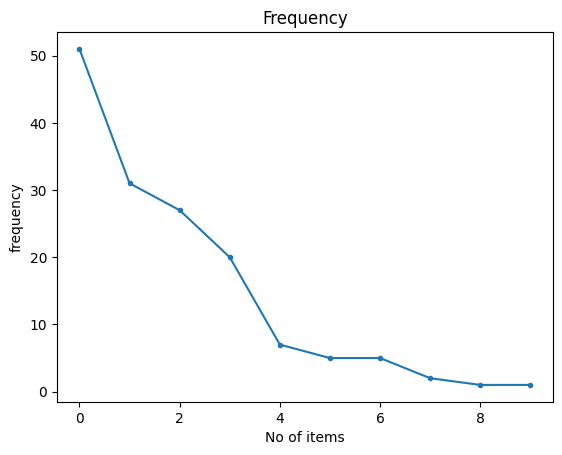

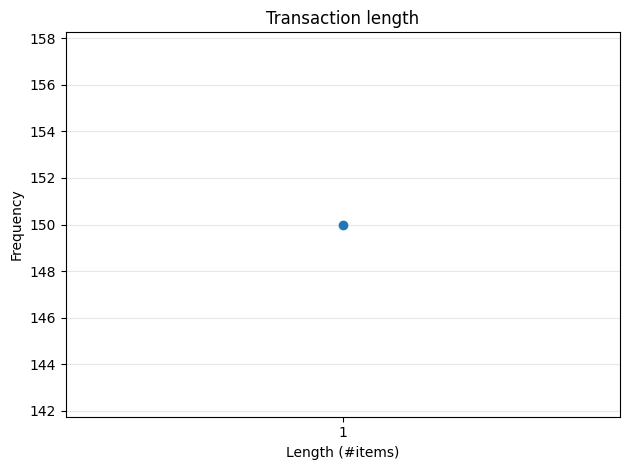

In [133]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('wallstreetbets.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 251
Number of items : 10
Minimum Transaction Size : 1
Average Transaction Size : 1.0
Maximum Transaction Size : 1
Standard Deviation Transaction Size : 0.0
Variance in Transaction Sizes : 0
Sparsity : 0.9


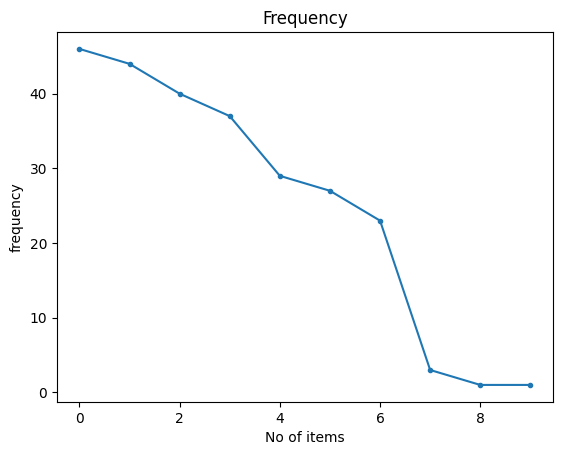

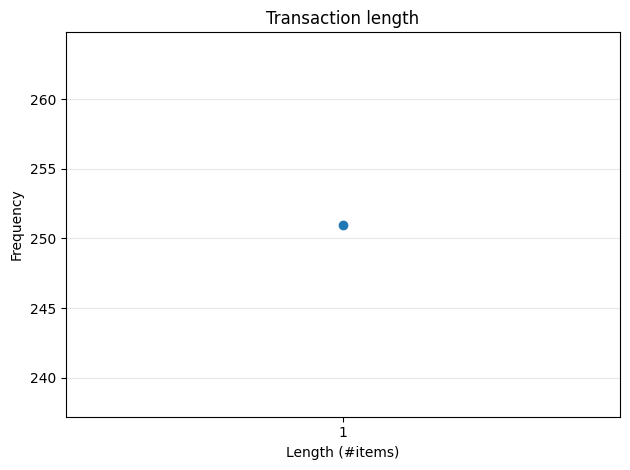

In [134]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('StockMarket.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 175
Number of items : 99
Minimum Transaction Size : 1
Average Transaction Size : 1.0
Maximum Transaction Size : 1
Standard Deviation Transaction Size : 0.0
Variance in Transaction Sizes : 0
Sparsity : 0.98989898989899


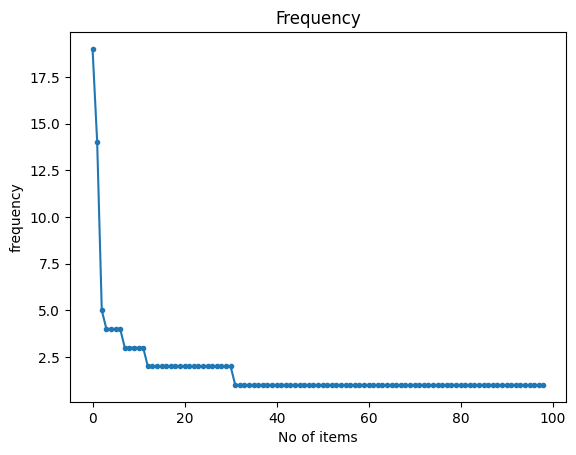

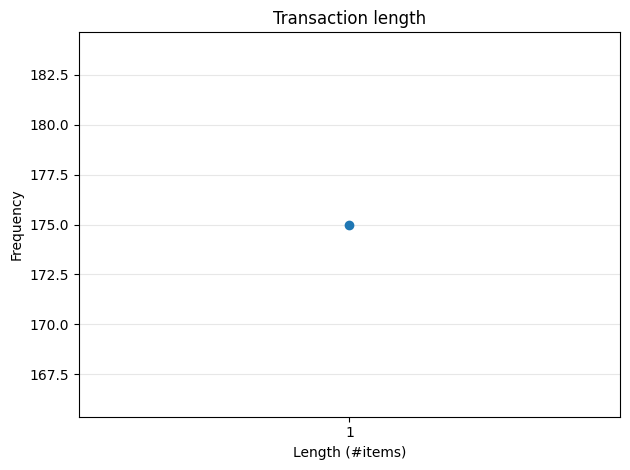

In [135]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('stockstobuytoday.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 275
Number of items : 12
Minimum Transaction Size : 1
Average Transaction Size : 1.0
Maximum Transaction Size : 1
Standard Deviation Transaction Size : 0.0
Variance in Transaction Sizes : 0
Sparsity : 0.9166666666666666


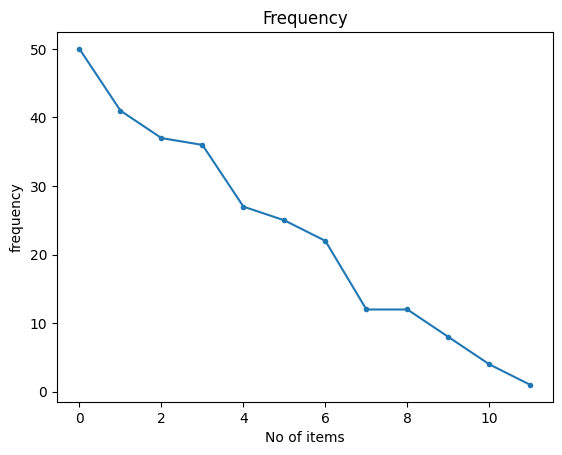

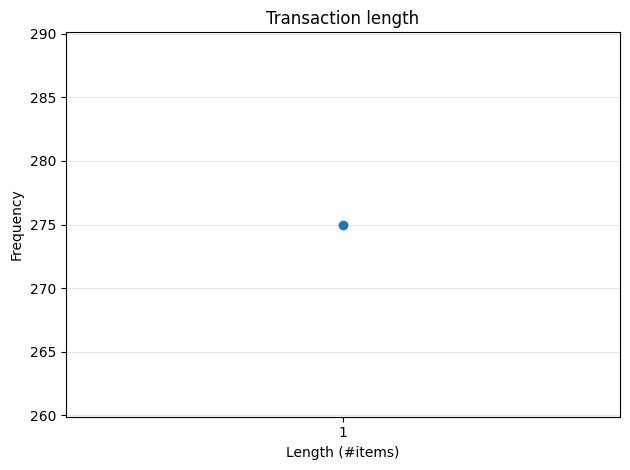

In [136]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('stocks.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [137]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='wallstreetbets.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4
Runtime: 0.0009996891021728516


In [138]:
obj1.save('freq_patterns_wallstreetbets_minSup9.txt') #save the patterns
frequentPatternsDF_sci_med

,Patterns,Support
0,Retardation is on the menu boys! WSB is so back,20
1,Someone post the hotline please.,27
2,"""Retail giant TARGET has now declined for 10 c...",31
3,"""Weekend Discussion Thread for the Weekend of ...",51


In [151]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='StockMarket.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 7
Runtime: 0.0019817352294921875


In [153]:
# 儲存頻繁模式到文本文件
with open('freq_patterns_StockMarket_minSup9.txt', 'w', encoding='utf-8') as f:
    for pattern, support in obj2._finalPatterns.items():
        f.write(f"{pattern}:{support}\n")


In [146]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='stockstobuytoday.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2
Runtime: 0.0009851455688476562


In [147]:
obj3.save('freq_patterns_stockstobuytoday_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

,Patterns,Support
0,r/stockstobuytoday Lounge,14
1,Technical Analysis Thread.,19


In [148]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='stocks.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9
Runtime: 0.0010020732879638672


In [149]:
obj3.save('freq_patterns_stocks_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

,Patterns,Support
0,The US bond market is continuing to crash. Wil...,12
1,US consumer sentiment plummets to second-lowes...,12
2,Rate My Portfolio - r/Stocks Quarterly Thread ...,22
3,Is the market in complete denial right now?,25
4,U.S. 10-year Treasury yields rise as Trump tar...,27
5,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,36
6,BREAKING: China raises tariffs on U.S. goods t...,37
7,"""It's fucking awful seeing the """"Silver"""" misi...",41
8,"""r/Stocks Daily Discussion & Fundamentals Frid...",50


In [155]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_comp_graphics,
       frequentPatternsDF_comp_graphics,
       frequentPatternsDF_alt_atheism,
       frequentPatternsDF_sci_med]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                                             Patterns  Support
10  "Weekend Discussion Thread for the Weekend of ...       51
6   How do you feel about a sitting president maki...       46
5   Data Shows US Allies—Not China—Dumping Treasuries       44
4   The Trump administration is begging Xi Jinping...       40
3                      $ U.S. dollar value (crashing)       37
9   "Retail giant TARGET has now declined for 10 c...       31
2   🚨China responds to Trump’s 145% tariff with an...       29
8                    Someone post the hotline please.       27
1   Trump: We Are Doing Really Well On Our Tariff ...       27
0   "Trump is surrounded by a bunch of idiots, he ...       23
7     Retardation is on the menu boys! WSB is so back       20
Number of patterns discarded: 18


In [163]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?,Data Shows US Allies—Not China—Dumping Treasuries,The Trump administration is begging Xi Jinping to call Trump quickly.,$ U.S. dollar value (crashing),"""Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history""",🚨China responds to Trump’s 145% tariff with an 125% tariff on all U.S. imported goods.,Someone post the hotline please.,Trump: We Are Doing Really Well On Our Tariff Policy.,"""Trump is surrounded by a bunch of idiots, he should just launch all his economic advisors into the sun.""",Retardation is on the menu boys! WSB is so back
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
import pandas as pd
from time import perf_counter

# 兼容不同版本的匯入寫法（有些版本路徑或名稱會微調）
try:
    from PAMI.frequentPattern.topk import FAE as FAEAlg
except ImportError:
    # 一些版本可能是 TopK/FAE 或 basic/topk/FAE，留作備援
    from PAMI.frequentPattern.topk.FAE import FAE as FAEAlg

def run_fae_topk(iFile, k):
    alg = FAEAlg.FAE(iFile=iFile, k=k)
    alg.mine()
    df = alg.getPatternsAsDataFrame()
    runtime = alg.getRuntime()
    print(f"[FAE Top-K] k={k}  | patterns={len(df)} | runtime={runtime:.4f}s")
    # 看前10筆
    display(df.head(10))
    return df, runtime

topk_results = {}
for k in [500]:
    df_k, rt_k = run_fae_topk('td_freq_db_comp_graphics.csv', k)
    topk_results[k] = {"df": df_k, "runtime": rt_k}

 TopK frequent patterns were successfully generated using FAE algorithm.
[FAE Top-K] k=500  | patterns=500 | runtime=4.2704s


,Patterns,Support
0,words,9
1,26,9
2,needs,9
3,done,8
4,displaying,8
5,recently,8
6,rumours,8
7,whether,8
8,always,8
9,looks,8


In [167]:
# 兼容不同版本的匯入寫法
try:
    from PAMI.frequentPattern.maximal import MaxFPGrowth as MaxFPAlg
except ImportError:
    from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth as MaxFPAlg

def run_maxfp(iFile, minSup):
    alg = MaxFPAlg.MaxFPGrowth(iFile=iFile, minSup=minSup)
    alg.mine()
    df = alg.getPatternsAsDataFrame()
    runtime = alg.getRuntime()
    print(f"[MaxFPGrowth] minSup={minSup} | patterns={len(df)} | runtime={runtime:.4f}s")
    display(df.head(10))
    return df, runtime

maxfp_results = {}
for ms in [3, 6, 9]:
    df_ms, rt_ms = run_maxfp('td_freq_db_comp_graphics.csv', ms)
    maxfp_results[ms] = {"df": df_ms, "runtime": rt_ms}


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] minSup=3 | patterns=626 | runtime=0.0665s


,Patterns,Support
0,650,3
1,trouble expect show gmt asked plain cpu fact c...,3
2,spatial,3
3,illinois,3
4,chicago,3
5,couple areas willing,3
6,third,3
7,always long believe human half huge instance m...,3
8,done believe expect isn asked plain risc,3
9,review,3


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] minSup=6 | patterns=65 | runtime=0.0040s


,Patterns,Support
0,31,6
1,tried,6
2,easily,6
3,add,6
4,specific,6
5,apr,6
6,open,6
7,particular,6
8,hard,6
9,motion,6


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
[MaxFPGrowth] minSup=9 | patterns=3 | runtime=0.0040s


,Patterns,Support
0,needs,9
1,26,9
2,words,9


In [169]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [170]:
X_pca_tdm.shape

(847, 2)

In [171]:
X_tsne_tdm.shape

(847, 2)

In [172]:
X_umap_tdm.shape

(847, 2)

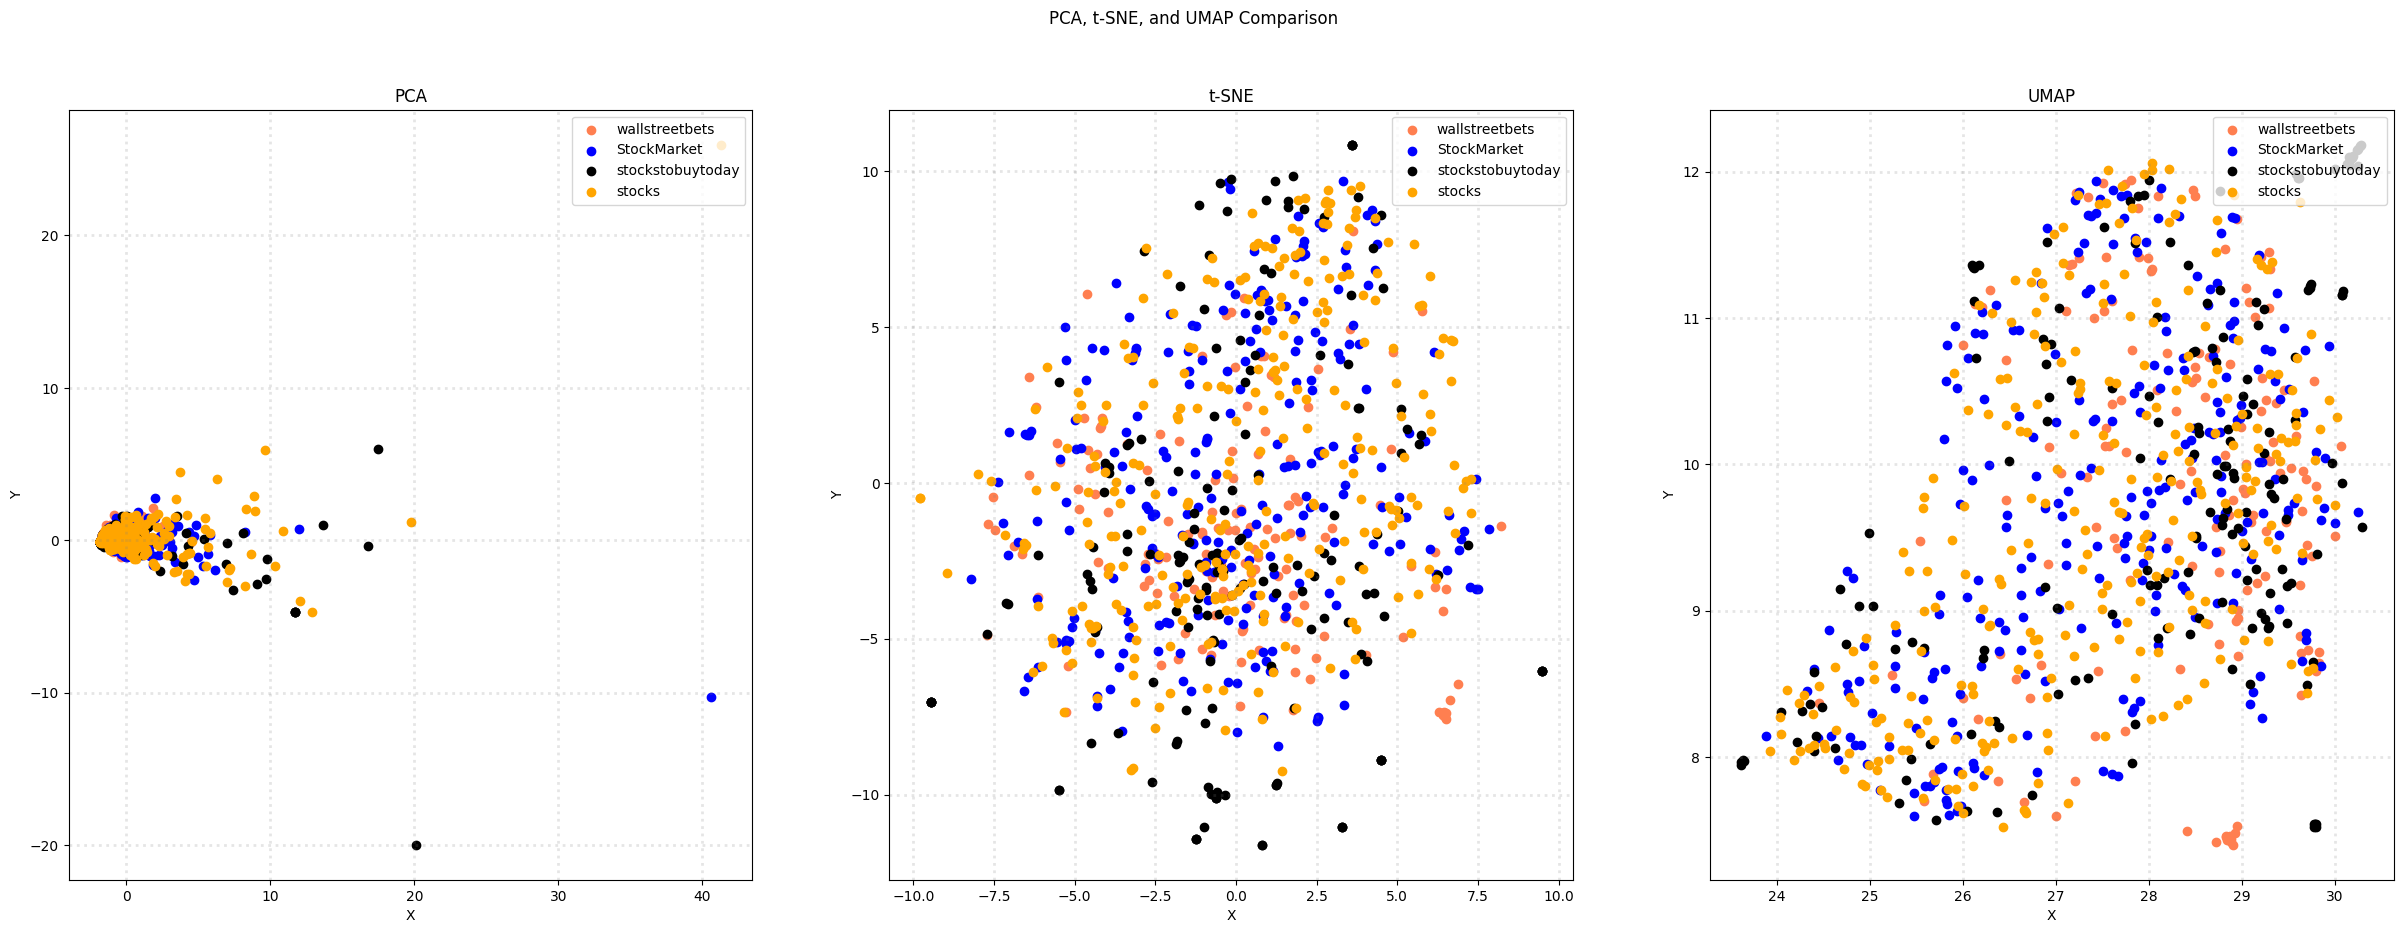

In [177]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['subreddit'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['subreddit'] == category].T[0]
        ys = X_reduced[df['subreddit'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [178]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

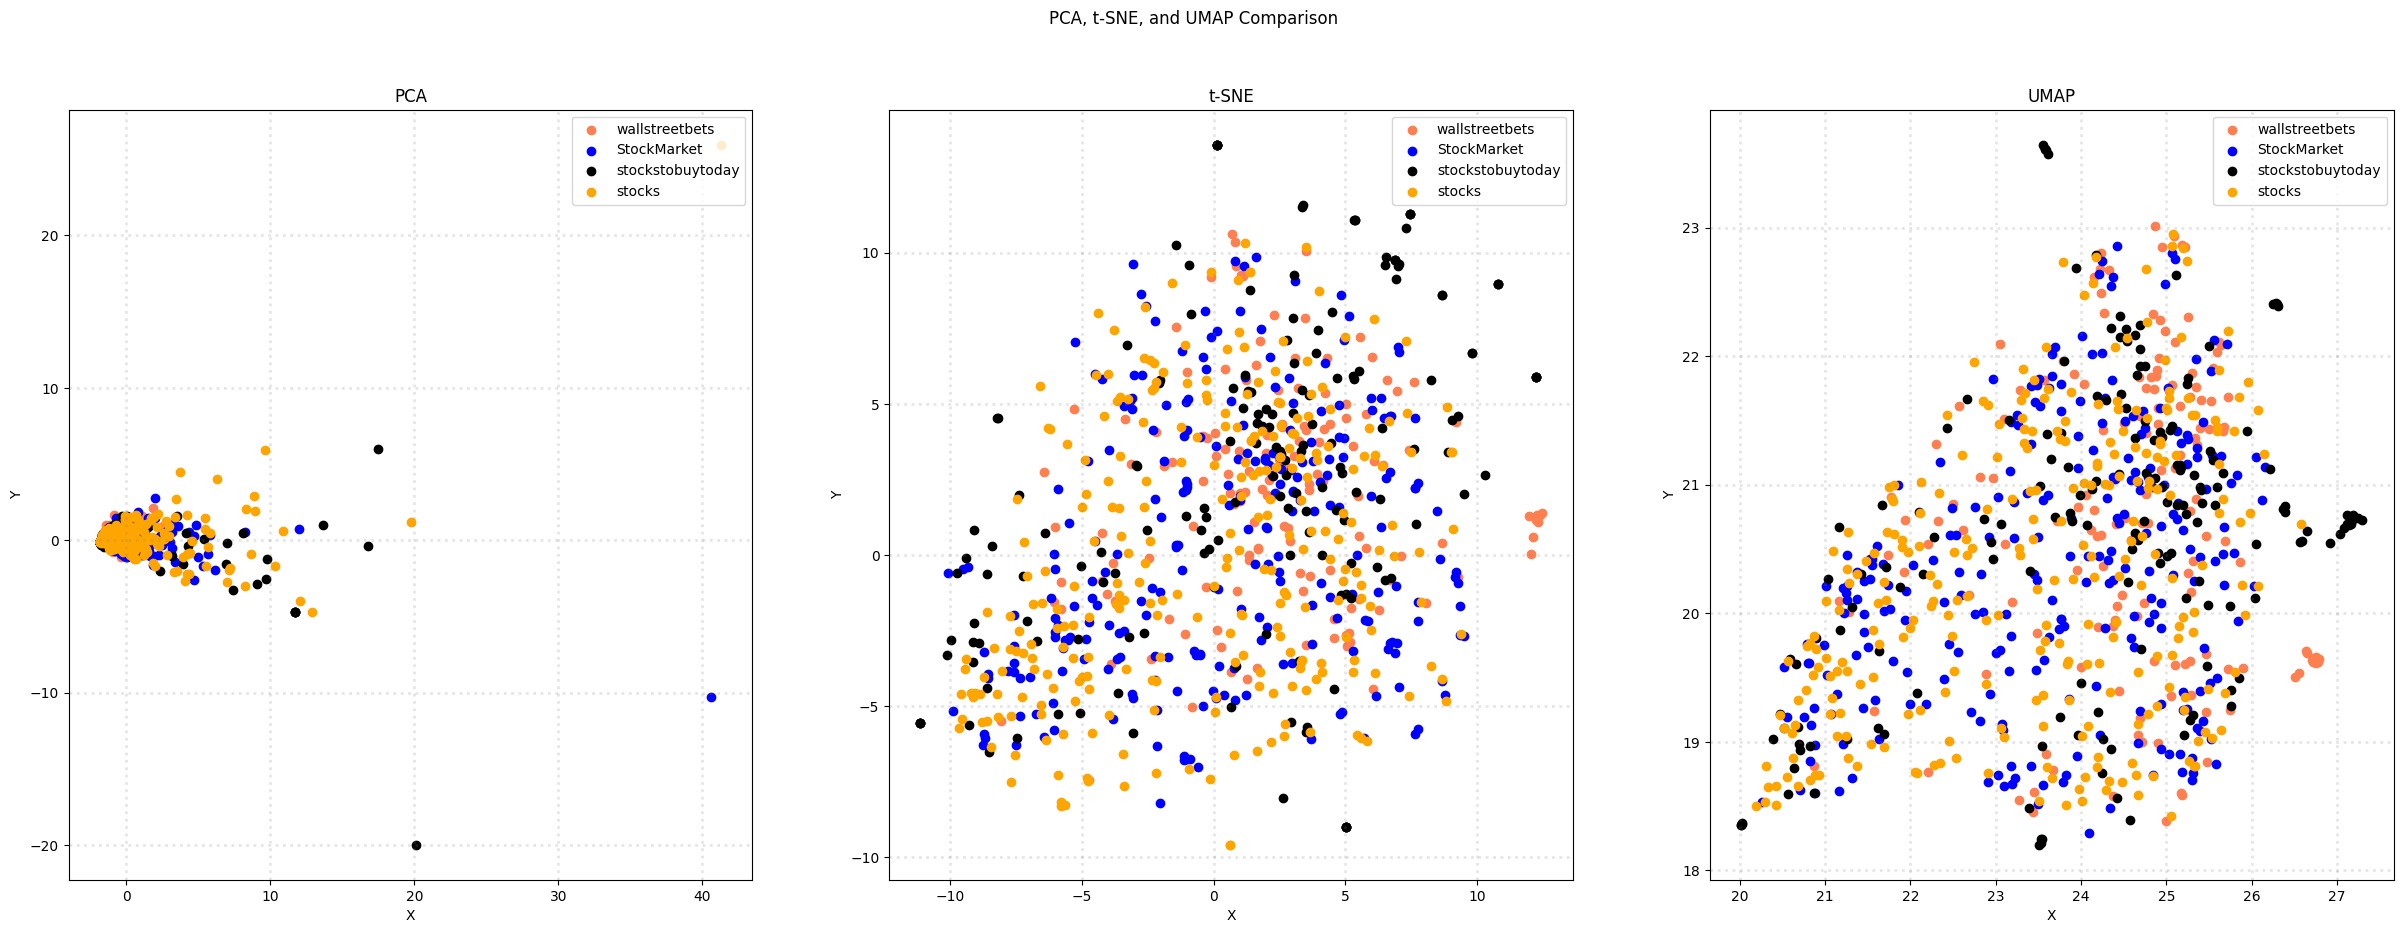

In [179]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['subreddit'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['subreddit'] == category].T[0]
        ys = X_reduced[df['subreddit'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

c:\Users\zzz31\Desktop\BIME\114-1\DataMining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



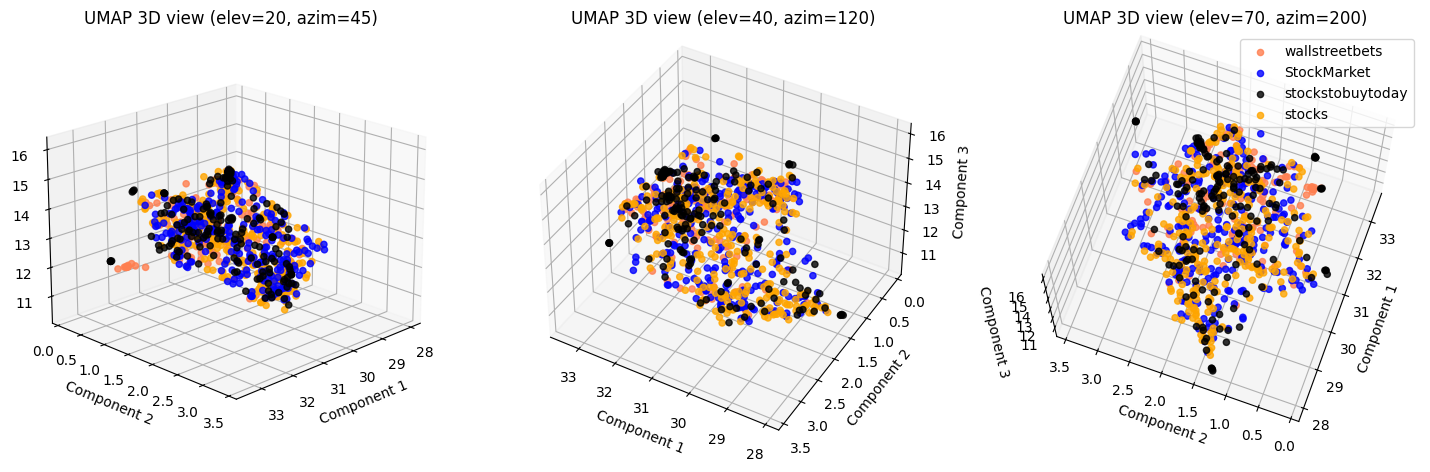

In [180]:
#Answer Here
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---- Step 1: 以 UMAP 將資料降至 3 維 ----
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(augmented_df.values)

# ---- Step 2: 定義顏色與類別 ----
col = ['coral', 'blue', 'black', 'orange']
categories = df['subreddit'].unique()

# ---- Step 3: 建立 3D 圖 ----
fig = plt.figure(figsize=(18, 6))

# 建立三個不同角度的視圖
angles = [(20, 45), (40, 120), (70, 200)]

for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    for c, category in zip(col, categories):
        idx = df['subreddit'] == category
        ax.scatter(
            X_umap_3d[idx, 0],
            X_umap_3d[idx, 1],
            X_umap_3d[idx, 2],
            c=c, label=category, s=20, alpha=0.8
        )
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f'UMAP 3D view (elev={elev}, azim={azim})')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')

plt.legend(loc='upper right')
plt.show()


In [181]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.subreddit)

LabelBinarizer()

In [182]:
df['bin_category'] = mlb.transform(df['subreddit']).tolist()

In [183]:
df[0:9]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,tokenized_text,bin_category
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"{Calls, retards, on}","[0, 0, 0, 1]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"{politics, did, talk, about, should, why, Stun...","[0, 0, 0, 1]"
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"{ticker., Seeing, red, of, the, lots, in}","[1, 0, 0, 0]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"{This, The, to, mph!, come, collaboration, at,...","[0, 0, 1, 0]"
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,"{He, didn’t, you., thank, say}","[1, 0, 0, 0]"
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,"{warm, to, wish, me, wet, luck, puss, tonight,...","[0, 0, 0, 1]"
6,comment,2025-04-11 12:37:23,mmjx7vz,stocks,Is the market in complete denial right now?,stoniey84,https://www.reddit.com/r/stocks/comments/1jwo1...,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,"{be, to, downwards, A, is, think, brutal...., ...","[0, 1, 0, 0]"
7,comment,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,https://i.redd.it/0yq2ftren8ue1.jpeg,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,"{been, slowly, 2, just, Its, mouth, of, by, mo...","[0, 0, 0, 1]"
8,comment,2021-02-01 15:36:32,gllyi5z,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,"{The, line, to, 52, base, breakout, new, held,...","[0, 1, 0, 0]"


In [184]:
# Answer here
from sklearn import preprocessing

# 建立 LabelBinarizer 物件
mlb = preprocessing.LabelBinarizer()

# 用 category_name 欄位進行編碼
mlb.fit(df['subreddit'])

# 轉換成 one-hot 陣列
df['bin_category'] = mlb.transform(df['subreddit']).tolist()

# 顯示部分結果
print(mlb.classes_)  # 確認類別順序
df[['subreddit', 'bin_category']].head(10)


['StockMarket' 'stocks' 'stockstobuytoday' 'wallstreetbets']


,subreddit,bin_category
0,wallstreetbets,"[0, 0, 0, 1]"
1,wallstreetbets,"[0, 0, 0, 1]"
2,StockMarket,"[1, 0, 0, 0]"
3,stockstobuytoday,"[0, 0, 1, 0]"
4,StockMarket,"[1, 0, 0, 0]"
5,wallstreetbets,"[0, 0, 0, 1]"
6,stocks,"[0, 1, 0, 0]"
7,wallstreetbets,"[0, 0, 0, 1]"
8,stocks,"[0, 1, 0, 0]"
9,stockstobuytoday,"[0, 0, 1, 0]"


In [187]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[10]
random_record_1 = random_record_1['title']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['title']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[800]
random_record_3 = random_record_3['title']
document_to_transform_3.append(random_record_3)

In [188]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['r/Stocks Daily Discussion & Fundamentals Friday Apr 11, 2025']
['The Trump administration is begging Xi Jinping to call Trump quickly.']
['Is the market in complete denial right now?']


In [189]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [191]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.204124
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\zzz31\AppData\Local\Temp\ipykernel_47468\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\zzz31\AppData\Local\Temp\ipykernel_47468\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\zzz31\AppData\Local\Temp\ipykernel_47468\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\zzz31\AppData\Local\Temp\ipykernel_47468\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

In [192]:
#Answer
document_to_transform_1 = []
random_record_1 = df.iloc[5]
random_record_1 = random_record_1['title']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[50]
random_record_2 = random_record_2['title']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[500]
random_record_3 = random_record_3['title']
document_to_transform_3.append(random_record_3)


In [193]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

In [194]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.166667
Cosine Similarity using count bw 1 and 3: 0.083333
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\zzz31\AppData\Local\Temp\ipykernel_47468\3530576229.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\zzz31\AppData\Local\Temp\ipykernel_47468\3530576229.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\zzz31\AppData\Local\Temp\ipykernel_47468\3530576229.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\zzz31\AppData\Local\Temp\ipykernel_47468\3530576229.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 t

In [197]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['subreddit', 'title']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['subreddit'], test_size=0.3, random_state=42)

In [198]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
X_test

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5529411764705883

Classification Report:
                                                                                      precision    recall  f1-score   support

                        Daily General Discussion and Advice Thread - April 11, 2025     0.5570    0.6111    0.5828        72
BlackRock’s Larry Fink says U.S. is very close to a recession and may be in one now     0.4885    0.7356    0.5872        87
                  $MRIN Marin Software killed it today. Hope someone took advantage     0.7826    0.3673    0.5000        49
                                 I would have rather lost money than feel this way.     0.6818    0.3191    0.4348        47

                                                                           accuracy                         0.5529       255
                                                                          macro avg     0.6275    0.5083    0.5262       255
                                                                     

In [202]:
#Answer
# 1. 使用增強數據進行分類
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 分割數據集，70% 訓練，30% 測試
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, df['subreddit'], test_size=0.3, random_state=42)

# 初始化Multinomial Naive Bayes分類器
nb_classifier_aug = MultinomialNB()

# 訓練分類器
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# 預測測試集
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

# 評估結果
accuracy_augmented = accuracy_score(y_test_aug, y_pred_aug)
report_augmented = classification_report(y_test_aug, y_pred_aug, target_names=target_names)

# 顯示結果
print(f"Accuracy with augmented data (with patterns): {accuracy_augmented:.4f}")
print("\nClassification Report for augmented data:")
print(report_augmented)


Accuracy with augmented data (with patterns): 0.5529

Classification Report for augmented data:
                                                                                     precision    recall  f1-score   support

                        Daily General Discussion and Advice Thread - April 11, 2025       0.56      0.61      0.58        72
BlackRock’s Larry Fink says U.S. is very close to a recession and may be in one now       0.49      0.74      0.59        87
                  $MRIN Marin Software killed it today. Hope someone took advantage       0.78      0.37      0.50        49
                                 I would have rather lost money than feel this way.       0.68      0.32      0.43        47

                                                                           accuracy                           0.55       255
                                                                          macro avg       0.63      0.51      0.53       255
                           

In [203]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.4392156862745098

Classification Report:
                                                                                      precision    recall  f1-score   support

                        Daily General Discussion and Advice Thread - April 11, 2025     0.4156    0.4444    0.4295        72
BlackRock’s Larry Fink says U.S. is very close to a recession and may be in one now     0.4930    0.4023    0.4430        87
                  $MRIN Marin Software killed it today. Hope someone took advantage     0.5581    0.4898    0.5217        49
                                 I would have rather lost money than feel this way.     0.3281    0.4468    0.3784        47

                                                                           accuracy                         0.4392       255
                                                                          macro avg     0.4487    0.4458    0.4432       255
                                                 